In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns ; sns.set()

In [15]:
df = pd.read_csv('stats.csv')
df

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Peralta, David",444482,2024,260,20.8,8.5,0.329,0.314,36.8,5.5,42.3,99.478011,93.919920,28.1,50.9
1,"Blackmon, Charlie",453568,2024,499,17.2,8.6,0.323,0.307,34.1,5.2,27.2,96.083584,92.106050,19.2,48.0
2,"Maldonado, Martín",455117,2024,147,34.7,5.4,0.181,0.223,29.9,8.0,35.6,98.499171,93.412793,36.1,49.3
3,"Solano, Donovan",456781,2024,309,21.0,7.1,0.333,0.310,37.0,3.7,37.4,98.057695,93.167455,23.5,47.2
4,"McCutchen, Andrew",457705,2024,515,25.8,11.3,0.325,0.331,31.5,11.7,36.7,99.420601,93.811240,28.9,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,"Lipscomb III, Trey",702358,2024,211,19.0,7.6,0.231,0.260,23.0,0.7,31.6,97.923016,92.984215,25.3,50.8
451,"Holliday, Jackson",702616,2024,208,33.2,7.2,0.251,0.262,27.0,8.2,45.1,100.212040,94.576203,33.9,46.1
452,"Wilson Jr., Jacob",805779,2024,103,9.7,7.8,0.281,0.291,26.2,0.0,19.0,94.500835,91.295348,12.7,49.6
453,"Yoshida, Masataka",807799,2024,421,12.4,6.4,0.336,0.324,36.3,5.5,37.5,99.090902,93.581913,14.6,45.4


In [16]:
df_final = df.drop(columns=['player_id', 'year', 'pa', 'xwoba', 'sweet_spot_percent', 'barrel_batted_rate', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed', 'whiff_percent', 'swing_percent'])
df_final

,"last_name, first_name",k_percent,bb_percent,woba
0,"Peralta, David",20.8,8.5,0.329
1,"Blackmon, Charlie",17.2,8.6,0.323
2,"Maldonado, Martín",34.7,5.4,0.181
3,"Solano, Donovan",21.0,7.1,0.333
4,"McCutchen, Andrew",25.8,11.3,0.325
...,...,...,...,...
450,"Lipscomb III, Trey",19.0,7.6,0.231
451,"Holliday, Jackson",33.2,7.2,0.251
452,"Wilson Jr., Jacob",9.7,7.8,0.281
453,"Yoshida, Masataka",12.4,6.4,0.336


In [17]:
woba = df_final.nlargest(10, 'woba').drop(columns=['k_percent', 'bb_percent'])
woba

,"last_name, first_name",woba
57,"Judge, Aaron",0.476
196,"Ohtani, Shohei",0.431
242,"Soto, Juan",0.421
213,"Tucker, Kyle",0.419
310,"Call, Alex",0.412
362,"Witt Jr., Bobby",0.410
316,"Alvarez, Yordan",0.402
240,"Guerrero Jr., Vladimir",0.398
23,"Ozuna, Marcell",0.395
274,"Rooker Jr., Brent",0.392


In [18]:
bb_percent = df_final.nlargest(10, 'bb_percent').drop(columns=['k_percent', 'woba'])
bb_percent


,"last_name, first_name",bb_percent
57,"Judge, Aaron",18.9
242,"Soto, Juan",18.1
213,"Tucker, Kyle",16.5
112,"Stewart, DJ",16.0
233,"Wade Jr., LaMonte",15.5
44,"Muncy, Max",15.4
187,"Schwarber, Kyle",15.3
146,"Thaiss, Matt",15.1
374,"Palacios, Richie",14.2
24,"Grossman, Robbie",13.9


In [19]:
smf.ols('woba ~ k_percent + bb_percent', data=df_final).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   woba   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     60.97
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.61e-24
Time:                        13:02:57   Log-Likelihood:                 863.13
No. Observations:                 455   AIC:                            -1720.
Df Residuals:                     452   BIC:                            -1708.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2883      0.008     36.896      0.000       0.273       0.304
k_percent     -0.0015      0.000     -5.642      0.000      -0.002      -0.001
bb_percent     0.0062      0.001     10.012      0.000       0.005       0.007
==============================================================================
Omnibus:                        1.184   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.977
Skew:                          -0.053   Prob(JB):                        0.613
Kurtosis:                       3.201   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results = smf.ols('woba ~ k_percent + bb_percent + sweet_spot_percent + avg_best_speed + swing_percent', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   woba   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.52e-82
Time:                        13:02:57   Log-Likelihood:                 1006.8
No. Observations:                 455   AIC:                            -2002.
Df Residuals:                     449   BIC:                            -1977.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6912      0.053    -13.135      0.000      -0.795      -0.588
k_percent             -0.0027      0.000    -13.131      0.000      -0.003      -0.002
bb_percent             0.0050      0.001      7.465      0.000       0.004       0.006
sweet_spot_percent     0.0029      0.000      9.546      0.000       0.002       0.003
avg_best_speed         0.0089      0.001     16.517      0.000       0.008       0.010
swing_percent          0.0008      0.000      2.172      0.030    7.57e-05       0.002
==============================================================================
Omnibus:                       10.182   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               18.050
Skew:                          -0.023   Prob(JB):                     0.000120
Kurtosis:                       3.975   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df_final.iloc[24]

last_name, first_name    Grossman, Robbie
k_percent                            23.7
bb_percent                           13.9
woba                                0.283
Name: 24, dtype: object

In [22]:
# manual calculation for woba for Robbie Grossman given our regression model
(-0.6912) + (-0.0027 * 23.7) + (0.0050 * 13.9) + (0.0029 * 30.3) + (0.0089 * 96.108368) + (0.0008 * 36.3)

0.2865844752

In [23]:
df_final['predicted_woba'] = results.predict()
df_final['residuals'] = df_final['woba'] - df_final['predicted_woba']
df_final

,"last_name, first_name",k_percent,bb_percent,woba,predicted_woba,residuals
0,"Peralta, David",20.8,8.5,0.329,0.323790,0.005210
1,"Blackmon, Charlie",17.2,8.6,0.323,0.293912,0.029088
2,"Maldonado, Martín",34.7,5.4,0.181,0.240487,-0.059487
3,"Solano, Donovan",21.0,7.1,0.333,0.301312,0.031688
4,"McCutchen, Andrew",25.8,11.3,0.325,0.301124,0.023876
...,...,...,...,...,...,...
450,"Lipscomb III, Trey",19.0,7.6,0.231,0.270565,-0.039565
451,"Holliday, Jackson",33.2,7.2,0.251,0.257823,-0.006823
452,"Wilson Jr., Jacob",9.7,7.8,0.281,0.274908,0.006092
453,"Yoshida, Masataka",12.4,6.4,0.336,0.327093,0.008907


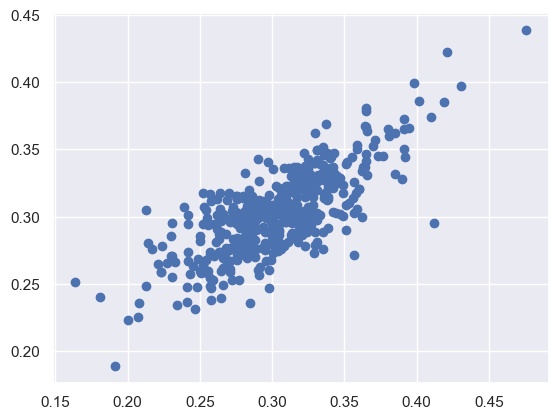

In [24]:
plt.scatter(x = 'woba', y='predicted_woba', data=df_final)


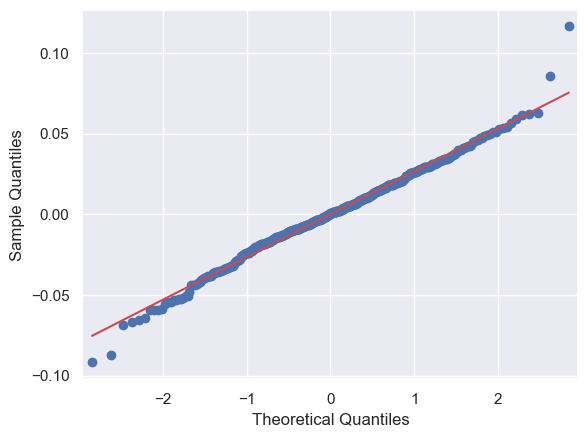

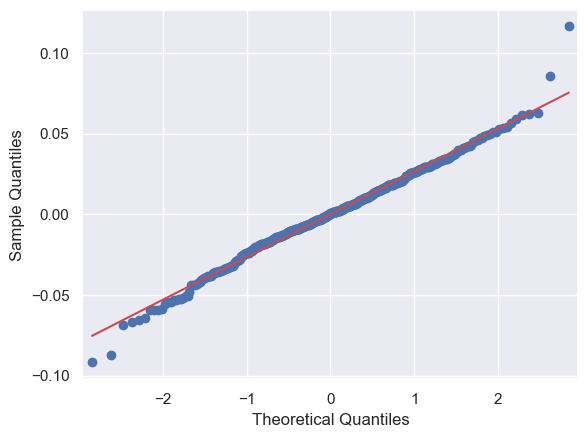

In [25]:
sm.qqplot(df_final['residuals'], line='s')   

In [26]:
df_final.to_csv('stats_with_predictions.csv', index=True)